In [59]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [60]:
import easydict
import json
args = easydict.EasyDict()

# path 정보
args.default_path = '/content/data/MyDrive/AI_study/2. Deep Learning/2. Vision Pytorch/Image_Processing/data/'

In [61]:
!pip install opencv-python

In [62]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

plt.ion();

array([[[210, 193, 101],
        [220, 205, 112],
        [221, 206, 113],
        ...,
        [121, 130,  25],
        [137, 146,  41],
        [156, 165,  58]],

       [[205, 188,  96],
        [219, 204, 109],
        [229, 216, 122],
        ...,
        [124, 132,  29],
        [131, 140,  35],
        [150, 159,  54]],

       [[203, 188,  93],
        [220, 206, 109],
        [240, 227, 131],
        ...,
        [133, 144,  42],
        [124, 135,  31],
        [135, 146,  42]],

       ...,

       [[ 95, 127,   4],
        [ 80, 111,   0],
        [109, 140,  23],
        ...,
        [108, 123,  20],
        [131, 146,  45],
        [166, 176,  79]],

       [[ 84, 120,   0],
        [ 94, 130,   8],
        [107, 142,  24],
        ...,
        [140, 153,  48],
        [182, 195,  90],
        [207, 215, 114]],

       [[133, 174,  46],
        [ 89, 129,   4],
        [ 79, 119,   0],
        ...,
        [175, 186,  81],
        [210, 221, 116],
        [197, 204, 101]]], dtype=uint8)
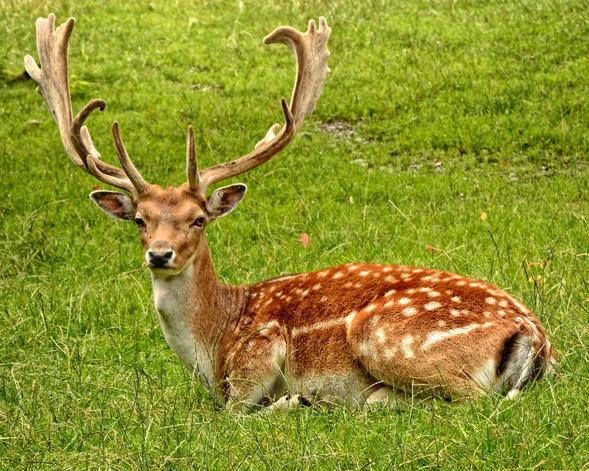

In [63]:
image_BGR = cv2.imread(args.default_path + 'deer_2.jpg')
image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
image_RGB

array([[[25, 26, 28],
        [25, 26, 28],
        [25, 26, 28],
        ...,
        [25, 26, 28],
        [25, 26, 28],
        [25, 26, 28]],

       [[25, 26, 28],
        [25, 26, 28],
        [25, 26, 28],
        ...,
        [25, 26, 28],
        [25, 26, 28],
        [25, 26, 28]],

       [[25, 26, 28],
        [25, 26, 28],
        [25, 26, 28],
        ...,
        [25, 26, 28],
        [25, 26, 28],
        [25, 26, 28]],

       ...,

       [[25, 26, 28],
        [25, 26, 28],
        [25, 26, 28],
        ...,
        [25, 26, 28],
        [25, 26, 28],
        [25, 26, 28]],

       [[25, 26, 28],
        [25, 26, 28],
        [25, 26, 28],
        ...,
        [25, 26, 28],
        [25, 26, 28],
        [25, 26, 28]],

       [[25, 26, 28],
        [25, 26, 28],
        [25, 26, 28],
        ...,
        [25, 26, 28],
        [25, 26, 28],
        [25, 26, 28]]], dtype=uint8)
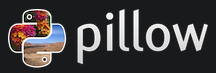

In [64]:
image_LOGO = cv2.imread(args.default_path + 'logo_pillow.png')
image_LOGO = cv2.cvtColor(image_LOGO, cv2.COLOR_BGR2RGB)
image_LOGO

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
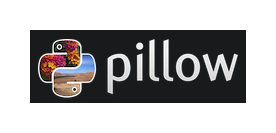

In [65]:
# 상, 하, 좌, 우에 추가할 padding 크기 설정
top = 30
bottom = 30
left = 30
right = 30

# 패딩 색상 설정 (BGR 형식, 흰색 예시: [255, 255, 255])
border_color = [255, 255, 255]

# 패딩 추가
padded_image_LOGO = cv2.copyMakeBorder(image_LOGO, top, bottom, left, right, cv2.BORDER_CONSTANT, value=border_color)
padded_image_LOGO

In [66]:
# 두 번째 이미지를 배경 이미지의 일부 영역에 맞게 크기 조정 (예: (100, 100)으로 리사이즈)
# overlay_resized = cv2.resize(padded_image_LOGO, (100, 100))
overlay_resized = padded_image_LOGO

# 배경 이미지에서 붙여넣을 위치 지정 (예: x=50, y=50 위치에 붙여넣기)
x_offset = 50
y_offset = 50

# 붙여넣을 영역 계산 -> 이미지 크기에 맞아야함...
y1, y2 = y_offset, y_offset+133# + overlay_resized.shape[0]
x1, x2 = x_offset, x_offset+276# + overlay_resized.shape[1]

# 배경 이미지의 해당 영역에 두 번째 이미지(overlay)를 붙여넣기
image_RGB[y1:y2, x1:x2] = overlay_resized

array([[[210, 193, 101],
        [220, 205, 112],
        [221, 206, 113],
        ...,
        [121, 130,  25],
        [137, 146,  41],
        [156, 165,  58]],

       [[205, 188,  96],
        [219, 204, 109],
        [229, 216, 122],
        ...,
        [124, 132,  29],
        [131, 140,  35],
        [150, 159,  54]],

       [[203, 188,  93],
        [220, 206, 109],
        [240, 227, 131],
        ...,
        [133, 144,  42],
        [124, 135,  31],
        [135, 146,  42]],

       ...,

       [[ 95, 127,   4],
        [ 80, 111,   0],
        [109, 140,  23],
        ...,
        [108, 123,  20],
        [131, 146,  45],
        [166, 176,  79]],

       [[ 84, 120,   0],
        [ 94, 130,   8],
        [107, 142,  24],
        ...,
        [140, 153,  48],
        [182, 195,  90],
        [207, 215, 114]],

       [[133, 174,  46],
        [ 89, 129,   4],
        [ 79, 119,   0],
        ...,
        [175, 186,  81],
        [210, 221, 116],
        [197, 204, 101]]], dtype=uint8)
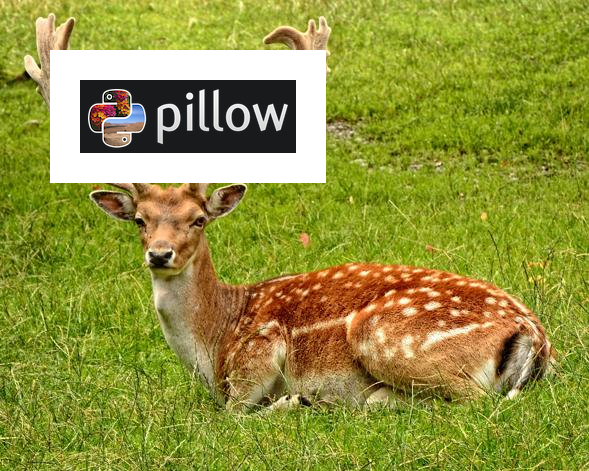

In [69]:
image_RGB